**Problem Statement**

**The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.**

1.Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

2.For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data set & checking the basic information from the data set

**Load the Data Set**

In [2]:
aerofit_df = pd.read_csv('aerofit_treadmill.csv')

In [3]:
aerofit_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**There is no null data in the dataset.**

In [5]:
aerofit_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**From the above, mean & median for all the numeric columns are very near. so the outliers are less.**

In [6]:
aerofit_df.describe(include=object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


** From the above, most repeated product is KP281.**

**Converting the age column into the categorical column**

In [7]:
age_bins=[17,25,30,35,40,45,50]
age_labels=['18-25','25-30','30-35','35-40','40-45','45-50']
aerofit_df['Age_Category'] = pd.cut(aerofit_df['Age'],bins=age_bins,labels=age_labels)
aerofit_df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category
0,KP281,18,Male,14,Single,3,4,29562,112,18-25
1,KP281,19,Male,15,Single,2,3,31836,75,18-25
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-25
3,KP281,19,Male,12,Single,3,3,32973,85,18-25
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-25


**Converting the income column into the categorical column**

In [8]:
income_bins=[20000,30000,40000,50000,60000,70000,80000,90000,100000,110000]
income_labels=['20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k','100k-110k']
aerofit_df['Income_Category'] = pd.cut(aerofit_df['Income'],bins=income_bins,labels=income_labels)
aerofit_df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Category,Income_Category
0,KP281,18,Male,14,Single,3,4,29562,112,18-25,20k-30k
1,KP281,19,Male,15,Single,2,3,31836,75,18-25,30k-40k
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-25,30k-40k
3,KP281,19,Male,12,Single,3,3,32973,85,18-25,30k-40k
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-25,30k-40k


In [9]:
aerofit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Product          180 non-null    object  
 1   Age              180 non-null    int64   
 2   Gender           180 non-null    object  
 3   Education        180 non-null    int64   
 4   MaritalStatus    180 non-null    object  
 5   Usage            180 non-null    int64   
 6   Fitness          180 non-null    int64   
 7   Income           180 non-null    int64   
 8   Miles            180 non-null    int64   
 9   Age_Category     180 non-null    category
 10  Income_Category  180 non-null    category
dtypes: category(2), int64(6), object(3)
memory usage: 13.7+ KB


# percenatge of categories in a particular category column

In [ ]:
aerofit_df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

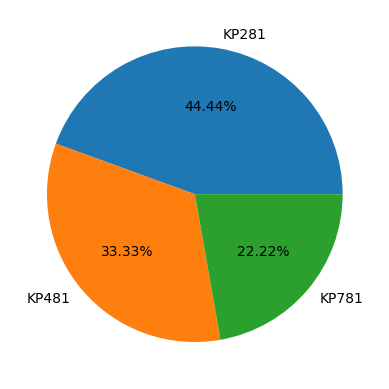

In [ ]:
plt.pie(aerofit_df['Product'].value_counts(),labels=aerofit_df['Product'].value_counts().index,autopct='%2.2f%%')
plt.show()

In [ ]:
aerofit_df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

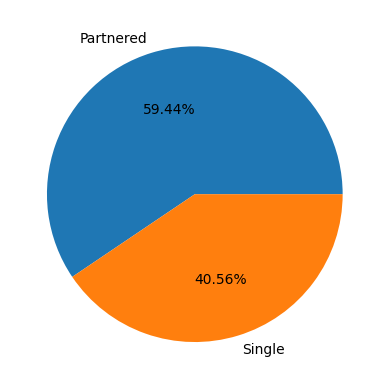

In [ ]:
plt.pie(aerofit_df['MaritalStatus'].value_counts(),labels=aerofit_df['MaritalStatus'].value_counts().index,autopct='%2.2f%%')
plt.show()

In [ ]:
aerofit_df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

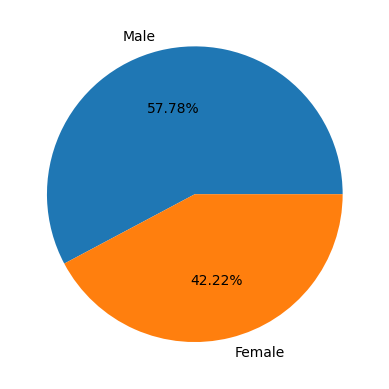

In [ ]:
plt.pie(aerofit_df['Gender'].value_counts(),labels=aerofit_df['Gender'].value_counts().index,autopct='%2.2f%%')
plt.show()

In [ ]:
aerofit_df['Age_Category'].value_counts()

18-25    79
25-30    41
30-35    32
35-40    16
40-45     6
45-50     6
Name: Age_Category, dtype: int64

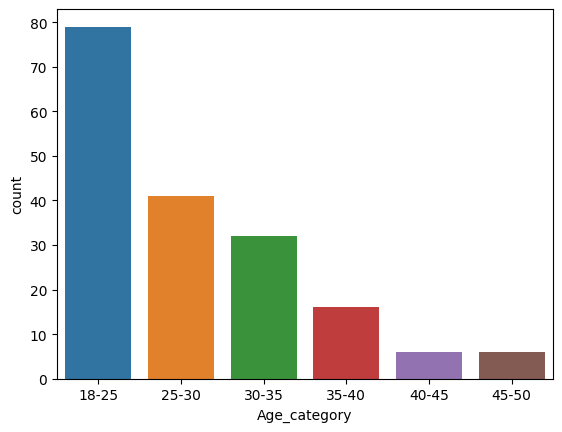

In [ ]:
sns.barplot(x=aerofit_df['Age_Category'].value_counts().index,y=aerofit_df['Age_Category'].value_counts())
plt.xlabel('Age_category')
plt.ylabel('count')
plt.show()

In [ ]:
aerofit_df['Income_Category'].value_counts()

50k-60k      55
40k-50k      51
30k-40k      31
60k-70k      19
90k-100k      9
80k-90k       7
70k-80k       4
100k-110k     3
20k-30k       1
Name: Income_Category, dtype: int64

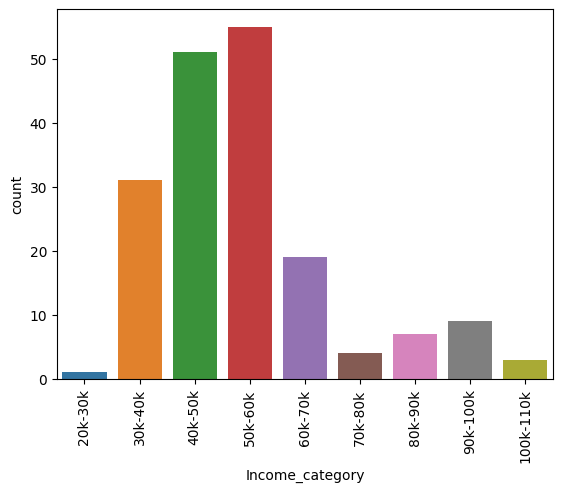

In [ ]:
sns.barplot(x=aerofit_df['Income_Category'].value_counts().index,y=aerofit_df['Income_Category'].value_counts())
plt.xticks(rotation=90)
plt.xlabel('Income_category')
plt.ylabel('count')
plt.show()

# Checking for duplicates

In [ ]:
aerofit_df.duplicated().sum()

0

**There are no duplicates in the given data**

# checking the influence of the martial status,Gender & age on the product purchased.

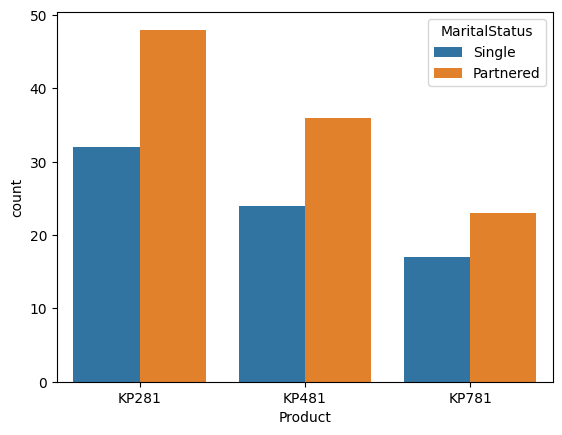

In [ ]:
sns.countplot(x=aerofit_df['Product'],hue=aerofit_df['MaritalStatus'])
plt.show()

Majority of users for every product is partnered.

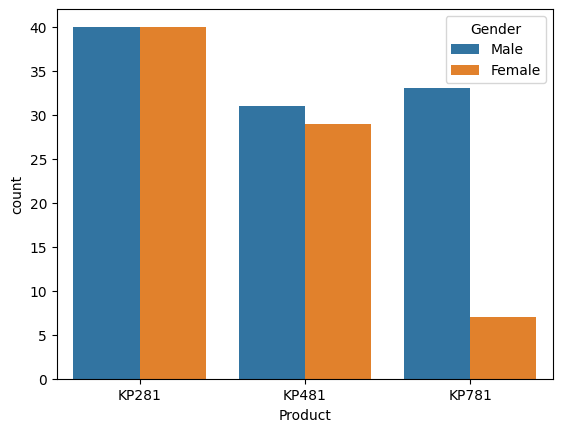

In [ ]:
sns.countplot(x=aerofit_df['Product'],hue=aerofit_df['Gender'])
plt.show()


1.   In KP281, the male & female users are same.
2.   In KP481, the male users were slightly high compared to female.
3.   In KP781, Male users are more compared to Female.


In [ ]:
aerofit_df.groupby(['Product','MaritalStatus'])['Age'].median()

Product  MaritalStatus
KP281    Partnered        27.5
         Single           25.0
KP481    Partnered        31.0
         Single           25.0
KP781    Partnered        28.0
         Single           24.0
Name: Age, dtype: float64

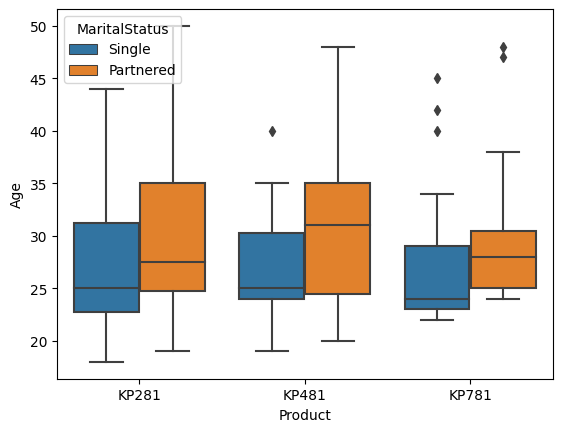

In [ ]:
sns.boxplot(x=aerofit_df['Product'],y=aerofit_df['Age'],hue=aerofit_df['MaritalStatus'])
plt.show()

1.   Medain age for the KP281 for the single & partnered are 25 & 27.5
2.   Medain age for the KP481 for the single & partnered are 25 & 31.0
3.   Medain age for the KP781 for the single & partnered are 24 & 28.0

From the above, single's are around the age of 25 for all the products.

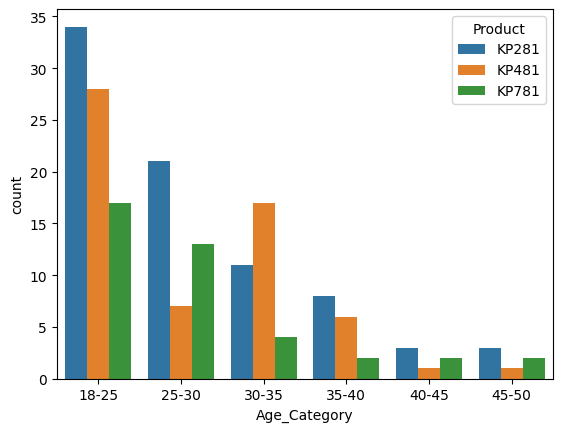

In [ ]:
sns.countplot(x=aerofit_df['Age_Category'],hue=aerofit_df['Product'])
plt.show()

In [ ]:
aerofit_df.groupby(['Product','MaritalStatus'])['Income'].median()

Product  MaritalStatus
KP281    Partnered        46617.0
         Single           43774.5
KP481    Partnered        51165.0
         Single           47185.5
KP781    Partnered        85906.0
         Single           58516.0
Name: Income, dtype: float64

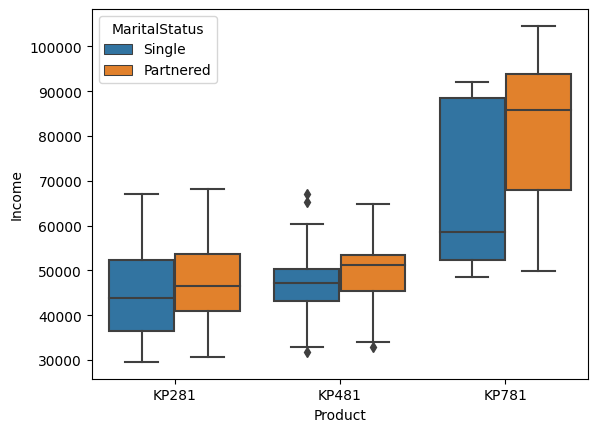

In [ ]:
sns.boxplot(x=aerofit_df['Product'],y=aerofit_df['Income'],hue=aerofit_df['MaritalStatus'])
plt.show()

1.   Medain Income for the KP281 for the single & partnered are 43K & 46K
2.   Medain Income for the KP481 for the single & partnered are 47k & 51k
3.   Medain Income for the KP781 for the single & partnered are 58k & 85k

For the product KP781, the users income is distributed over the long range compared to other two products.

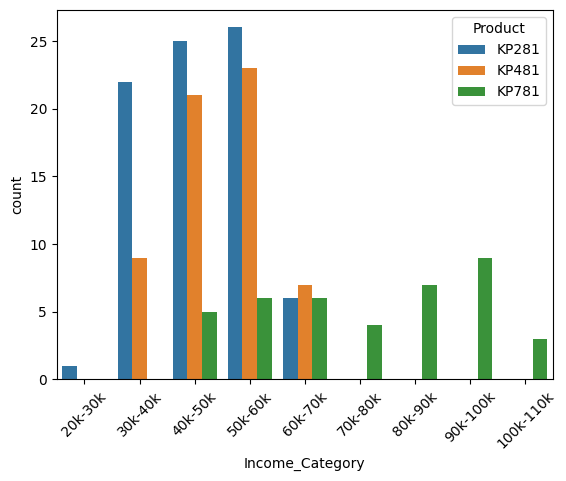

In [ ]:
sns.countplot(x=aerofit_df['Income_Category'],hue=aerofit_df['Product'])
plt.xticks(rotation =45)
plt.show()

1.   From the above, Income above 70k are using the KP781.
2.   Income below 40k, 70% are using mostly the KP281.



**Education analysis for the 3 products**

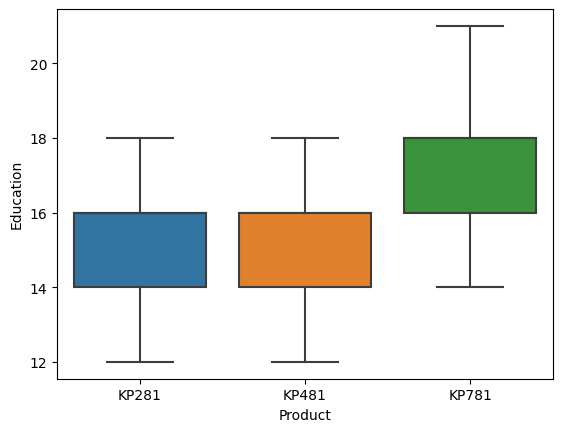

In [ ]:
sns.boxplot(x=aerofit_df['Product'],y=aerofit_df['Education'])
plt.show()

1.   Users with KP281,KP481 are having the same level in the education.
2.   Users with KP781 are having the higher level in the education.



**Education analysis for the 3 products with segregation of Marital Status**

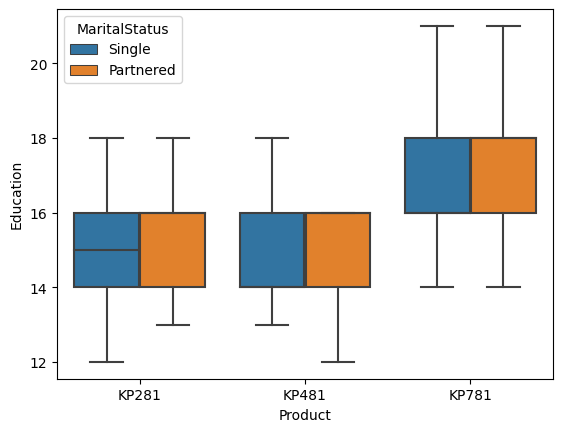

In [ ]:
sns.boxplot(x=aerofit_df['Product'],y=aerofit_df['Education'],hue=aerofit_df['MaritalStatus'])
plt.show()

From the above, KP781 users are highly educated than the KP281,KP481

**Education analysis for the 3 products with segregation of Gender**

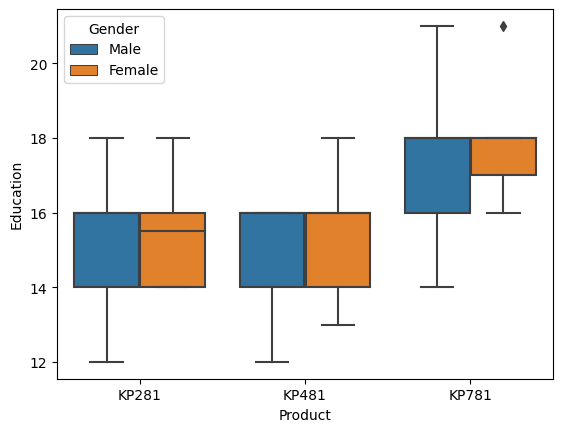

In [ ]:
sns.boxplot(x=aerofit_df['Product'],y=aerofit_df['Education'],hue=aerofit_df['Gender'])
plt.show()

**Miles analysis for the 3 products**

In [ ]:
aerofit_df.groupby('Product')['Miles'].median()

Product
KP281     85.0
KP481     85.0
KP781    160.0
Name: Miles, dtype: float64

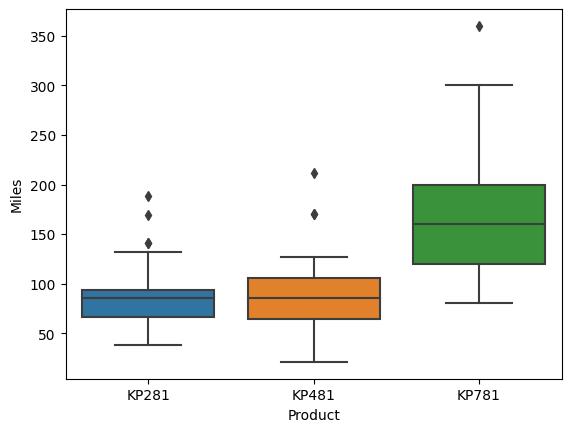

In [ ]:
sns.boxplot(x=aerofit_df['Product'],y=aerofit_df['Miles'])
plt.show()

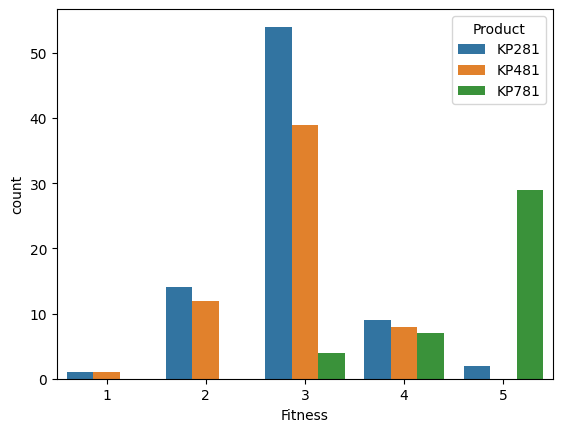

In [ ]:
sns.countplot(x=aerofit_df['Fitness'],hue=aerofit_df['Product'])
plt.show()

1.   For KP281, the majority were rated themselves as 3.
2.   For KP781, the majority were rated themselves as 5.


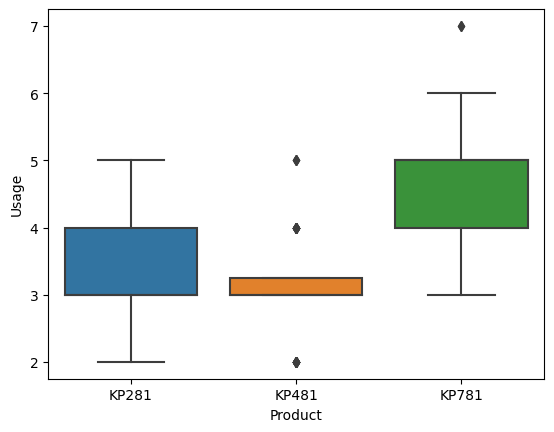

In [ ]:
sns.boxplot(x=aerofit_df['Product'],y=aerofit_df['Usage'])
plt.show()

1.   50% of the users having KP281 product, use 3-4 days a week
2.   50% of the users having KP781 product, use 4-5 days a week

# Marginal & conditional Propability across the products for each caetgory column

**Upon the Gender**

In [ ]:
pd.crosstab(aerofit_df['Product'],aerofit_df['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


<Axes: xlabel='Gender', ylabel='Product'>

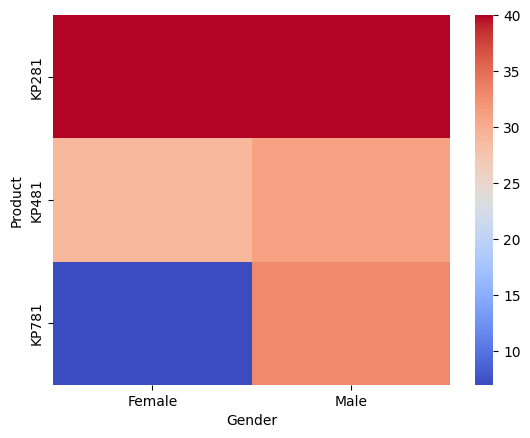

In [ ]:
sns.heatmap(pd.crosstab(aerofit_df['Product'],aerofit_df['Gender']),cmap='coolwarm')

**Upon the Marital Status**

In [ ]:
pd.crosstab(aerofit_df['Product'],aerofit_df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


<Axes: xlabel='MaritalStatus', ylabel='Product'>

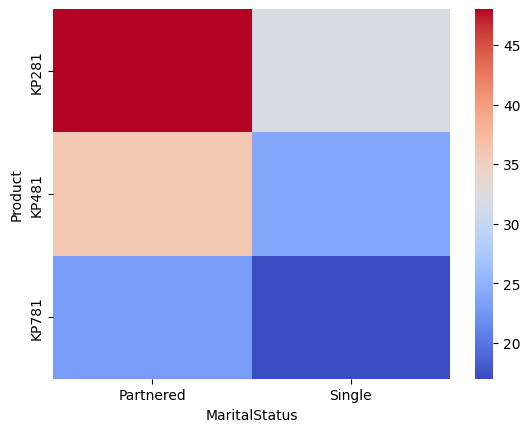

In [ ]:
sns.heatmap(pd.crosstab(aerofit_df['Product'],aerofit_df['MaritalStatus']),cmap='coolwarm')

**Upon the Income Group**

In [ ]:
pd.crosstab(aerofit_df['Product'],aerofit_df['Income_Category'])

Income_Category,20k-30k,30k-40k,40k-50k,50k-60k,60k-70k,70k-80k,80k-90k,90k-100k,100k-110k
Product,,,,,,,,,
KP281,1,22,25,26,6,0,0,0,0
KP481,0,9,21,23,7,0,0,0,0
KP781,0,0,5,6,6,4,7,9,3


Upon the Age Group

In [ ]:
pd.crosstab(aerofit_df['Product'],aerofit_df['Age_Category'])

Age_Category,18-25,25-30,30-35,35-40,40-45,45-50
Product,,,,,,
KP281,34,21,11,8,3,3
KP481,28,7,17,6,1,1
KP781,17,13,4,2,2,2


<Axes: xlabel='Gender', ylabel='Product'>

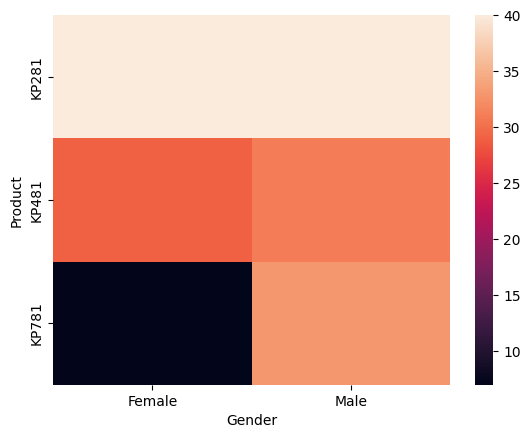

**Corelation for the product KP281**

<ipython-input-86-3196c6bf092c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(aerofit_df.loc[aerofit_df['Product']=='KP281'].corr(),cmap='coolwarm')


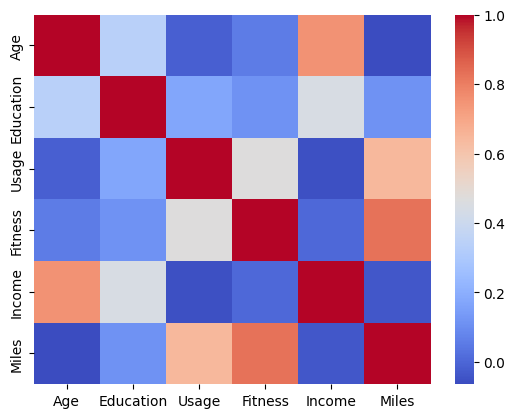

In [ ]:
sns.heatmap(aerofit_df.loc[aerofit_df['Product']=='KP281'].corr(),cmap='coolwarm')
plt.show()

1.   Corelation between age & Miles was poor, fitness & miles was good.
2.   Corelation between age & income was average.



**Corelation for the product KP481**

<ipython-input-84-395c2a3ed9f5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(aerofit_df.loc[aerofit_df['Product']=='KP481'].corr(),cmap='coolwarm')


<Axes: >

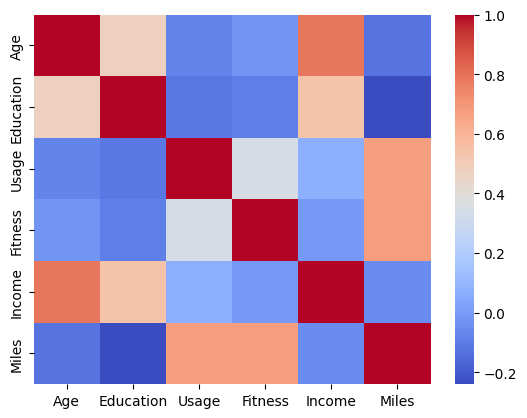

In [ ]:
sns.heatmap(aerofit_df.loc[aerofit_df['Product']=='KP481'].corr(),cmap='coolwarm')
plt.show()

**Corelation for the product KP781**

<ipython-input-85-e0e67e97cfb7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(aerofit_df.loc[aerofit_df['Product']=='KP781'].corr(),cmap='coolwarm')


<Axes: >

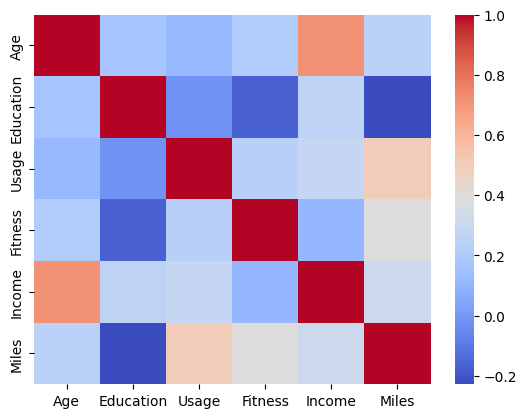

In [ ]:
sns.heatmap(aerofit_df.loc[aerofit_df['Product']=='KP781'].corr(),cmap='coolwarm')
plt.show()

# Segregation of data set as per the product

In [ ]:
Product_KP281 = aerofit_df.loc[aerofit_df['Product']=='KP281']
Product_KP481 = aerofit_df.loc[aerofit_df['Product']=='KP481']
Product_KP781 = aerofit_df.loc[aerofit_df['Product']=='KP781']

In [ ]:
Product_KP281['Fitness'].value_counts()

3    54
2    14
4     9
5     2
1     1
Name: Fitness, dtype: int64

In [ ]:
Product_KP481['Fitness'].value_counts()

3    39
2    12
4     8
1     1
Name: Fitness, dtype: int64

In [ ]:
Product_KP781['Fitness'].value_counts()

5    29
4     7
3     4
Name: Fitness, dtype: int64

**Count plot for the Fitness level**

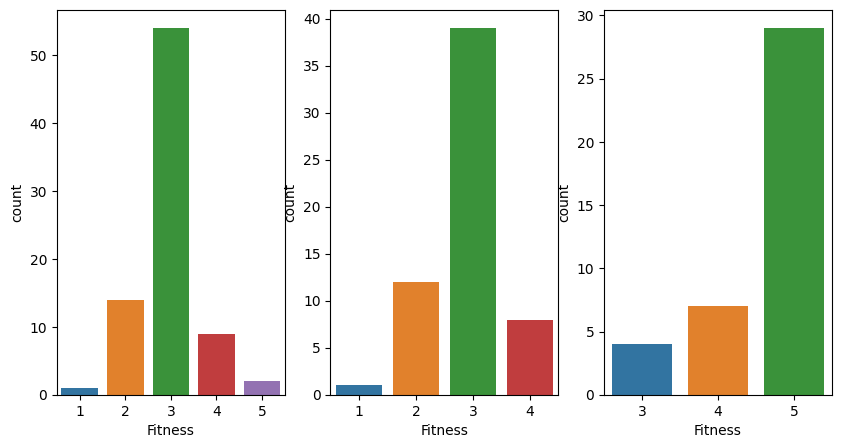

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x=Product_KP281['Fitness'])
plt.subplot(1,3,2)
sns.countplot(x=Product_KP481['Fitness'])
plt.subplot(1,3,3)
sns.countplot(x=Product_KP781['Fitness'])
plt.show()

In [ ]:
Product_KP281['Usage'].value_counts()

3    37
4    22
2    19
5     2
Name: Usage, dtype: int64

In [ ]:
Product_KP481['Usage'].value_counts()

3    31
2    14
4    12
5     3
Name: Usage, dtype: int64

In [ ]:
Product_KP781['Usage'].value_counts()

4    18
5    12
6     7
7     2
3     1
Name: Usage, dtype: int64

**Count plot for the Usage level**

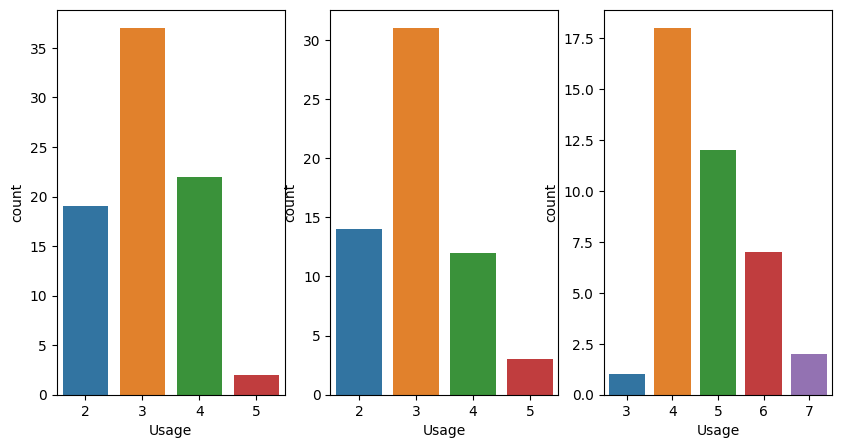

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x=Product_KP281['Usage'])
plt.subplot(1,3,2)
sns.countplot(x=Product_KP481['Usage'])
plt.subplot(1,3,3)
sns.countplot(x=Product_KP781['Usage'])
plt.show()

In [ ]:
Product_KP281['Miles'].value_counts()

85     16
75     10
66     10
47      9
94      8
113     8
56      6
103     3
38      3
141     2
132     2
112     1
188     1
169     1
Name: Miles, dtype: int64

In [ ]:
Product_KP481['Miles'].value_counts()

95     12
85     11
106     8
53      7
64      6
127     5
42      4
74      3
170     2
212     1
21      1
Name: Miles, dtype: int64

In [ ]:
Product_KP781['Miles'].value_counts()

100    7
200    6
180    6
160    5
150    4
120    3
106    1
140    1
80     1
240    1
170    1
300    1
280    1
260    1
360    1
Name: Miles, dtype: int64

In [ ]:
Product_KP281['Education'].value_counts()

16    39
14    30
15     4
13     3
12     2
18     2
Name: Education, dtype: int64

In [ ]:
Product_KP481['Education'].value_counts()

16    31
14    23
13     2
18     2
12     1
15     1
Name: Education, dtype: int64

In [ ]:
Product_KP781['Education'].value_counts()

18    19
16    15
21     3
14     2
20     1
Name: Education, dtype: int64


**count plot for the education years**

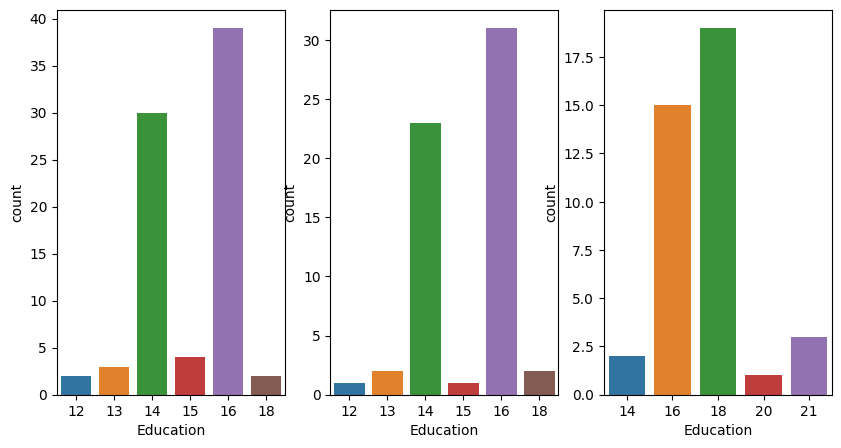

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x=Product_KP281['Education'])
#plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.countplot(x=Product_KP481['Education'])
#plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.countplot(x=Product_KP781['Education'])
#plt.xticks(rotation=90)
plt.show()

In [ ]:
Product_KP281['Income_Category'].value_counts()

50k-60k      26
40k-50k      25
30k-40k      22
60k-70k       6
20k-30k       1
70k-80k       0
80k-90k       0
90k-100k      0
100k-110k     0
Name: Income_Category, dtype: int64

In [ ]:
Product_KP481['Income_Category'].value_counts()

50k-60k      23
40k-50k      21
30k-40k       9
60k-70k       7
20k-30k       0
70k-80k       0
80k-90k       0
90k-100k      0
100k-110k     0
Name: Income_Category, dtype: int64

In [ ]:
Product_KP781['Income_Category'].value_counts()

90k-100k     9
80k-90k      7
50k-60k      6
60k-70k      6
40k-50k      5
70k-80k      4
100k-110k    3
20k-30k      0
30k-40k      0
Name: Income_Category, dtype: int64

**Count plot for the Income group**

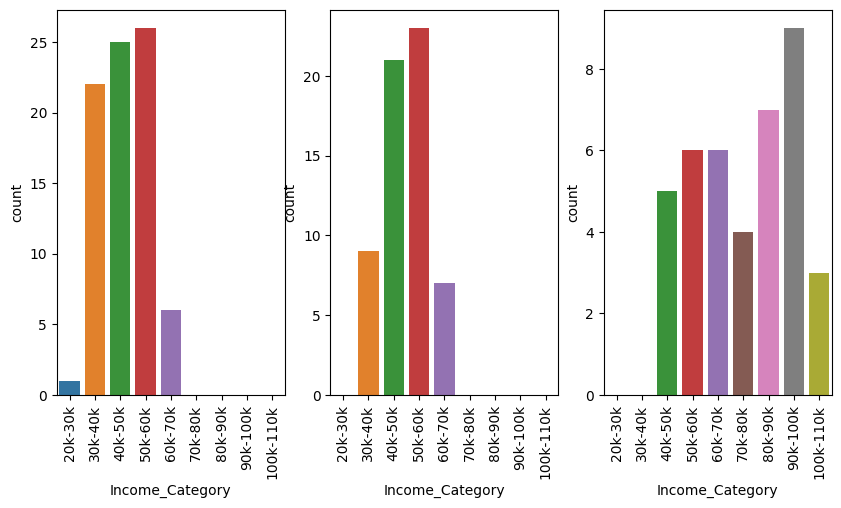

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x=Product_KP281['Income_Category'])
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.countplot(x=Product_KP481['Income_Category'])
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.countplot(x=Product_KP781['Income_Category'])
plt.xticks(rotation=90)
plt.show()

# Propability for the data segregated by product

# Insights

**Insights for KP281**

1.   Users having this product are majorly in the income range of 30k-60k.
2.   Users having this product are having a medain of 85 miles.
3.   Users having this product are having fitness level 3.
4.   Users having this product have a median of education of 16 years.
5.   Majority Users having this product have usage of 3 days a week.

**Insights for KP481**

1.   Users having this product are majorly in the income range of 40k-60k
2.   Users having this product are having a medain of 85 miles.
3.   Users having this product are having fitness level 3.
4.   Users having this product have a median of education of 16 years.
5.   Majority Users having this product have usage of 3 days a week.

**Insights for KP781**

1.   Users having income greater than 70k are using KP781.
2.   Users having this product are having a medain of 160 miles.
3.   Users having this product are having fitness level 5.
4.   Users having this product have a median of education of 18 years.
5.   Majority Users having this product have usage of 4 days a week.

**General**

1. % of Partnered users are more than the single users.
2. % of male users are more than the female users.